### Statistical analysis of past competitions on CodaLab Competitions

- Field of application
- ML domain
- Number of participants, submissions
- Reward
- Utility
- etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

In [38]:
# Read data
db = pd.read_csv('data/metadata-utility.csv', sep='|')

#db.fillna(-1, inplace=True) # remove NaN
db['reward_USD'].fillna(-1, inplace=True) # remove NaN in reward
db['reward_USD'] = db['reward_USD'].replace('None', -1).astype(int) # convert reward to int
# Removing dassault competiton, which is an outlier as for the reward, and was private

db.drop(db[db['title'] == 'AI4Industry Dassault-Aviation Challenge'].index, inplace=True)

# Replace by multi-domain where there are multiple domains
db['ML domain'] = db['ML domain'].apply(lambda x: 'multi-domain' if ',' in str(x) else x)

# New columns
db['submission_per_participant'] = db['submissions']/db['participants']
db['log_reward'] = np.log(db['reward_USD']+1)
db['log_submissions'] = np.log(db['submissions'])
db['log_participants'] = np.log(db['participants'])

print(db.shape)

(829, 32)


/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [3]:
db.head(3)

title  \
0  The Third Evaluation Workshop on Chinese Machi...   
1    Pose-guided Human Rendering Benchmark Challenge   
2  MICCAI Multimodal Brain Tumor Segmentation (BR...   

                                         description  participants  \
0  It is the sentence cloze-style machine reading...            46   
1  HUMBI is an ideal dataset to evaluate the abil...            12   
2  The BRaTS challenge is designed to gauge the c...           141   

   submissions  year  phases    reward  reward_USD  duration_day  \
0        248.0  2019     3.0  6500 USD        6500          87.0   
1         65.0  2013     1.0         0           0           NaN   
2         50.0  2013     2.0         0           0          22.0   

                                           challenge  ... multi-score  \
0  https://competitions.codalab.org/competitions/...  ...        True   
1  https://competitions.codalab.org/competitions/...  ...       False   
2    https://competitions.codalab.org/competitions/1  ...        True   

  multi-task results submission code submission  \
0      False               True           False   
1      False               True           False   
2      False               True           False   

                                              remark               utility  \
0  https://github.com/ymcui/cmrc2019/tree/master/...  [1.1760304486375888]   
1       https://github.com/Gorokke/humanrender_class   [1.192140697304481]   
2                                                NaN                 [0.0]   

  submission_per_participant log_reward log_submissions log_participants  
0                   5.391304   8.779711        5.513429         3.828641  
1                   5.416667   0.000000        4.174387         2.484907  
2                   0.354610   0.000000        3.912023         4.948760  

[3 rows x 32 columns]

### Choose if to include year 2022

In [4]:
# without 2022!
#db = db[db.year!=2022].copy()

## EDA

In [32]:
db.describe().round(decimals = 2)

# Used for report
#db[['participants', 'submissions', 'reward_USD', 'duration_day', 'code submission']].describe().round(decimals = 2)

/opt/homebrew/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


participants  submissions    year  phases  reward_USD  duration_day  \
count        829.00       822.00   829.0  829.00      829.00        805.00   
mean         139.93       789.21  2019.7    2.41      866.78        617.79   
std          284.45      2366.61     1.9    2.30     3480.15       3276.82   
min            5.00        10.00  2013.0    1.00       -1.00          0.00   
25%           35.00        69.00  2019.0    2.00       -1.00         41.00   
50%           71.00       204.50  2020.0    2.00       -1.00         73.00   
75%          147.00       577.00  2021.0    2.00       -1.00        130.00   
max         4894.00     35260.00  2022.0   36.00    40000.00      29384.00   

       submission_per_participant  log_reward  log_submissions  \
count                      822.00       829.0           822.00   
mean                         5.39        -inf             5.37   
std                          7.92         NaN             1.53   
min                          0.07        -inf             2.30   
25%                          1.45         NaN             4.23   
50%                          3.14         NaN             5.32   
75%                          6.46         NaN             6.36   
max                        129.76        10.6            10.47   

       log_participants  
count            829.00  
mean               4.28  
std                1.07  
min                1.61  
25%                3.56  
50%                4.26  
75%                4.99  
max                8.50

In [40]:
print(db['ML domain'].nunique())
print(db['ML domain'].unique())

6
['NLP' 'computer vision' 'AutoML' 'multi-domain' 'signal processing' 'RL']


In [41]:
db['ML domain'].value_counts(normalize=True)

computer vision      0.449940
NLP                  0.378770
multi-domain         0.089264
signal processing    0.032569
AutoML               0.027744
RL                   0.021713
Name: ML domain, dtype: float64

In [33]:
db['reward_USD'].value_counts(bins=4)

(-41.001999999999995, 9999.25]    805
(9999.25, 19999.5]                 16
(19999.5, 29999.75]                 5
(29999.75, 40000.0]                 3
Name: reward_USD, dtype: int64

In [42]:
pd.set_option('display.max_columns', 100)
db.groupby('ML domain')[['participants','submissions','reward_USD']].\
                        agg(['count', 'sum',  'mean', 'median',np.std, np.min, np.max])

participants                                             \
                         count    sum        mean median         std amin   
ML domain                                                                   
AutoML                      23   2463  107.086957   56.0  154.820105   15   
NLP                        314  33682  107.267516   56.5  146.394228    6   
RL                          18   1889  104.944444   69.0   86.430164    6   
computer vision            373  69189  185.493298   89.0  392.258827    8   
multi-domain                74   6856   92.648649   53.5  110.121282    5   
signal processing           27   1920   71.111111   69.0   46.992089   14   

                        submissions                                            \
                   amax       count       sum        mean median          std   
ML domain                                                                       
AutoML              717          22   13839.0  629.045455  272.5  1114.168042   
NLP                1297         313  211737.0  676.476038  195.0  1658.568219   
RL                  273          18   10977.0  609.833333  231.5   805.504172   
computer vision    4894         370  350123.0  946.278378  210.0  2885.852350   
multi-domain        531          72   49389.0  685.958333  151.0  2910.822029   
signal processing   223          27   12663.0  469.000000  352.0   635.150921   

                                 reward_USD                               \
                   amin     amax      count     sum         mean  median   
ML domain                                                                  
AutoML             25.0   5097.0         23  111989  4869.086957  1000.0   
NLP                10.0  18149.0        314   80371   255.958599    -1.0   
RL                 11.0   3150.0         18   91496  5083.111111  6000.0   
computer vision    10.0  35260.0        373  340785   913.632708    -1.0   
multi-domain       12.0  24724.0         74   93842  1268.135135    -1.0   
signal processing  11.0   2696.0         27      75     2.777778    -1.0   

                                            
                           std amin   amax  
ML domain                                   
AutoML             9190.449172   -1  33500  
NLP                1564.693562   -1  20000  
RL                 4815.206732   -1  15000  
computer vision    3601.014639   -1  40000  
multi-domain       4296.009172   -1  25000  
signal processing    19.431009   -1    100

In [43]:
#median feartures per ML domain
db.groupby('ML domain').median()

/var/folders/48/4n4hcp112zbdf81wrzbqmc3c0000gn/T/ipykernel_90941/612829443.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  db.groupby('ML domain').median()


participants  submissions    year  phases  reward_USD  \
ML domain                                                                  
AutoML                     56.0        272.5  2019.0     2.0      1000.0   
NLP                        56.5        195.0  2020.0     2.0        -1.0   
RL                         69.0        231.5  2021.0     2.0      6000.0   
computer vision            89.0        210.0  2020.0     2.0        -1.0   
multi-domain               53.5        151.0  2020.0     2.0        -1.0   
signal processing          69.0        352.0  2021.0     2.0        -1.0   

                   duration_day  submission_per_participant  log_reward  \
ML domain                                                                 
AutoML                     90.0                    4.600000    6.908755   
NLP                        71.0                    3.648352        -inf   
RL                        127.0                    3.297743    8.699681   
computer vision            74.0                    2.542281        -inf   
multi-domain               66.0                    2.829223        -inf   
signal processing          46.0                    3.315789        -inf   

                   log_submissions  log_participants  
ML domain                                             
AutoML                    5.607031          4.025352  
NLP                       5.273000          4.034201  
RL                        5.392966          4.231474  
computer vision           5.347108          4.488636  
multi-domain              5.016731          3.979638  
signal processing         5.863631          4.234107

In [44]:
# dif stats on feature "participants" per ML domain
# filtered in ascending order per median value
db.groupby('ML domain')['participants'].agg(['count', 'sum',  'mean', 'median']).sort_values(by='median', ascending=False)

count    sum        mean  median
ML domain                                          
computer vision      373  69189  185.493298    89.0
RL                    18   1889  104.944444    69.0
signal processing     27   1920   71.111111    69.0
NLP                  314  33682  107.267516    56.5
AutoML                23   2463  107.086957    56.0
multi-domain          74   6856   92.648649    53.5

In [45]:
pd.crosstab(db['ML domain'], db['year'])

year               2013  2014  2015  2016  2017  2018  2019  2020  2021  2022
ML domain                                                                    
AutoML                0     1     5     0     1     1     6     3     1     5
NLP                   0     2     3    32    20    25    42    83    74    33
RL                    0     0     0     0     1     0     1     6     8     2
computer vision       2     6     7    10    19    32    63    67   100    67
multi-domain          0     0     3     1     5     5     6    22    16    16
signal processing     0     0     0     0     0     2     2     4    15     4

## Histograms

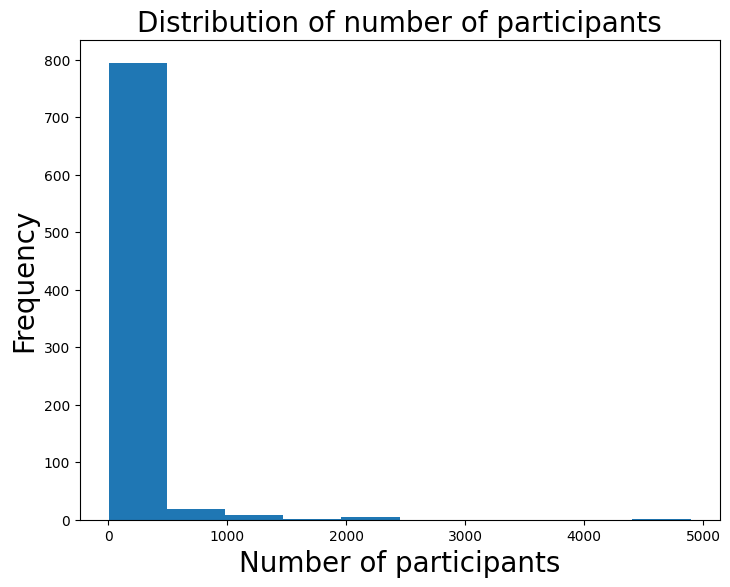

In [46]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(db['participants'])
axes.set_xlabel('Number of participants', fontsize=20)
axes.set_ylabel('Frequency', fontsize=20)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams["figure.figsize"] = (5,5)
axes.set_title('Distribution of number of participants')
plt.show();

#shorter version:
#db['participants'].plot(kind = 'hist', grid = True, title = 'Distribution of participants')

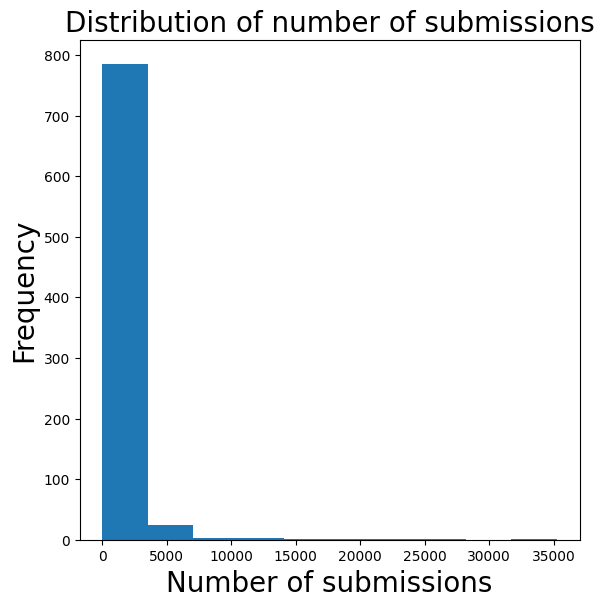

In [47]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(db['submissions'])
axes.set_xlabel('Number of submissions', fontsize=20)
axes.set_ylabel('Frequency', fontsize=20)
axes.set_title('Distribution of number of submissions')
plt.show()

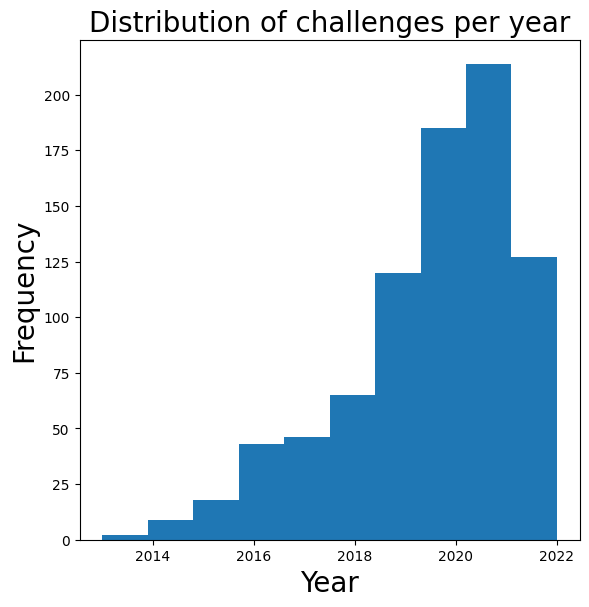

In [48]:
#2022 is not complet
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(db['year'])
axes.set_xlabel('Year', fontsize=20)
axes.set_ylabel('Frequency', fontsize=20)
axes.set_title('Distribution of challenges per year')
plt.show();

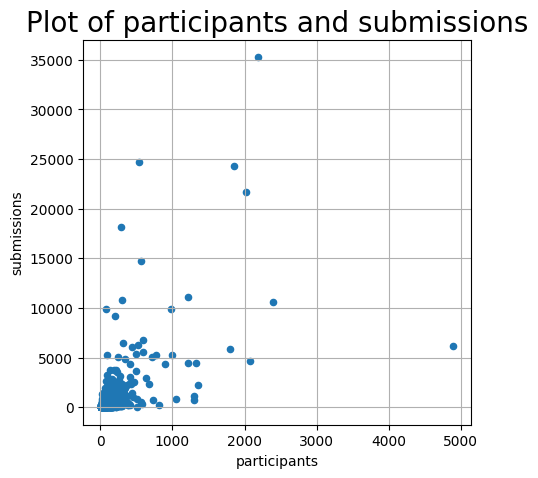

In [49]:
db.plot(x = 'participants', y = 'submissions', kind = 'scatter', grid = True, title = 'Plot of participants and submissions')
plt.savefig("images/participants_submissions.png")

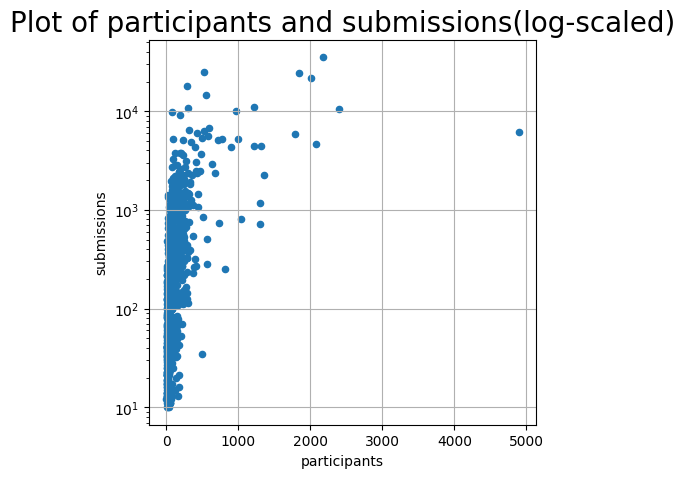

In [50]:
#db.plot(x = 'participants', y = 'log_submissions', kind = 'scatter', grid = True, title = 'Plot of participants and submissions')
db.plot(x = 'participants', y = 'submissions', logy=True, kind = 'scatter', grid = True, \
        title = 'Plot of participants and submissions(log-scaled)')
plt.savefig("images/participants_log_submissions.png")

<AxesSubplot: title={'center': 'Plot of participants and submissions(log-scaled both)'}, xlabel='participants', ylabel='submissions'>

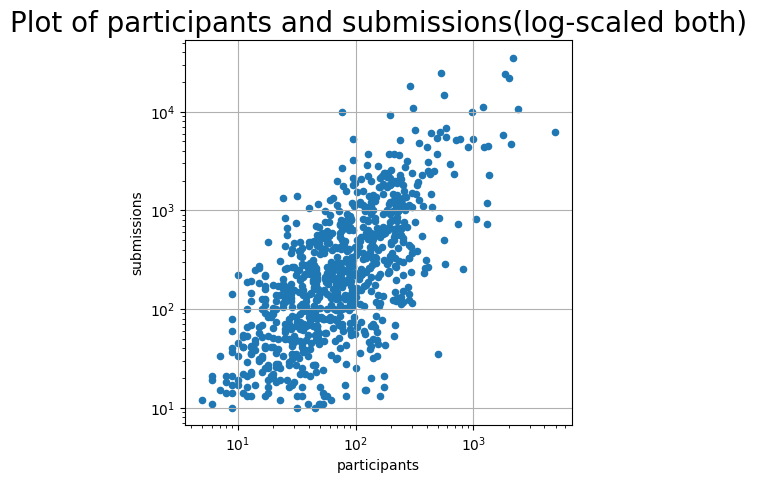

In [51]:
db.plot(x = 'participants', y = 'submissions', logx=True, logy=True, \
        kind = 'scatter', grid = True, title = 'Plot of participants and submissions(log-scaled both)')
#plt.savefig("images/log_participants_log_submissions.png")

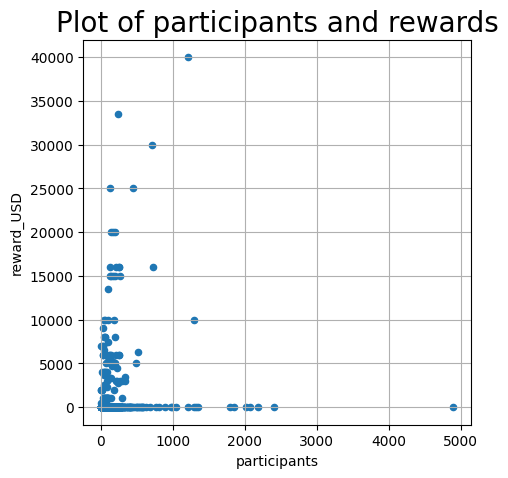

In [52]:
db.plot(x = 'participants', y = 'reward_USD', kind = 'scatter', \
        grid = True, title = 'Plot of participants and rewards')
plt.savefig("images/participants_reward.png")

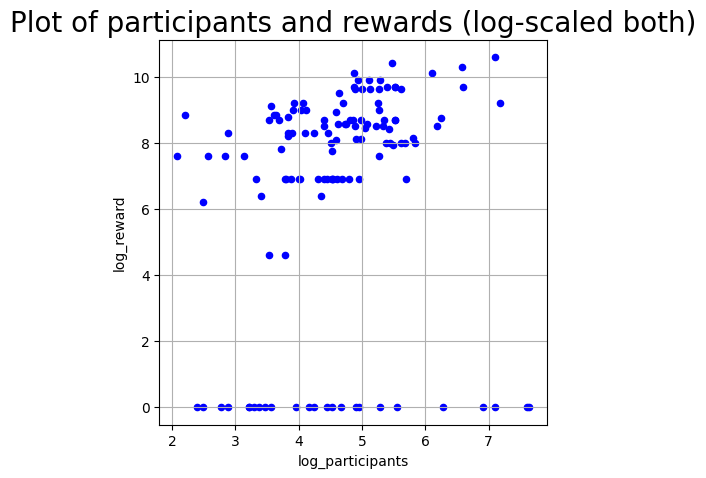

In [53]:
db.plot(x = 'log_participants', y = 'log_reward', color="blue",\
        kind = 'scatter', grid = True, \
        title = 'Plot of participants and rewards (log-scaled both)')
plt.savefig("images/log_participants_log_reward.png")

In [54]:
db['results submission'].value_counts(normalize=True)

True     0.993917
False    0.006083
Name: results submission, dtype: float64

In [55]:
db['code submission'].value_counts(normalize=True)

False    0.836983
True     0.163017
Name: code submission, dtype: float64

In [56]:
db.groupby('year')['code submission'].apply(lambda x: x.value_counts(normalize=True))

year       
2013  False    1.000000
2014  True     0.555556
      False    0.444444
2015  False    0.722222
      True     0.277778
2016  False    1.000000
2017  False    0.934783
      True     0.065217
2018  False    0.892308
      True     0.107692
2019  False    0.895652
      True     0.104348
2020  False    0.842391
      True     0.157609
2021  False    0.784038
      True     0.215962
2022  False    0.787402
      True     0.212598
Name: code submission, dtype: float64

Text(0, 0.5, 'proportion of code submission competitions')

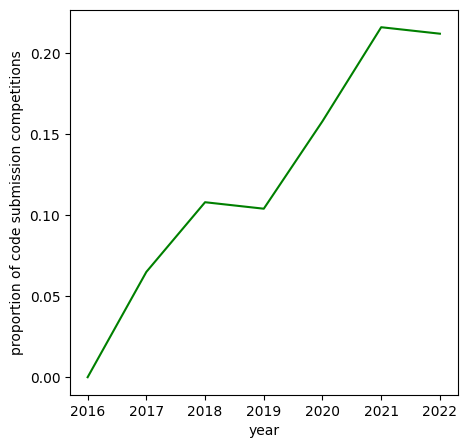

In [60]:
year = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
code_ratio = [0.0, 0.065, 0.108, 0.104, 0.158, 0.216, 0.212]
plt.plot(year, code_ratio, color='green')
plt.xlabel('year')
plt.ylabel('proportion of code submission competitions')

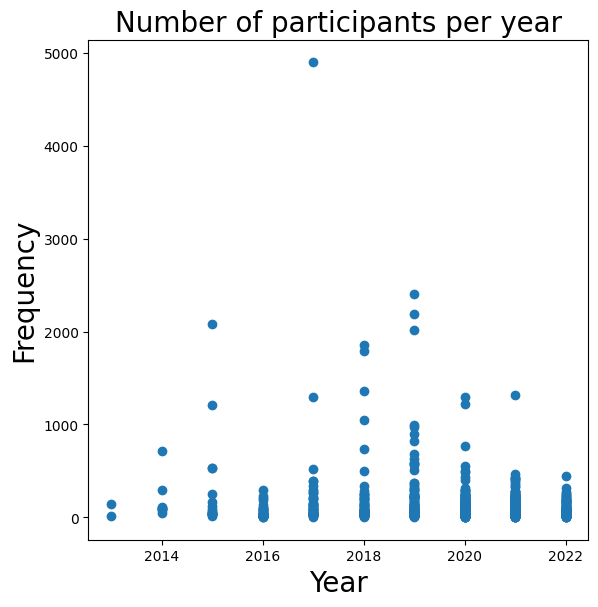

In [61]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_xlabel('Year', fontsize=20)
axes.set_ylabel('Frequency', fontsize=20)
plt.rcParams['axes.titlesize'] = 20
axes.set_title('Number of participants per year')
axes.scatter(x = db['year'], y = db['participants'])
plt.show()

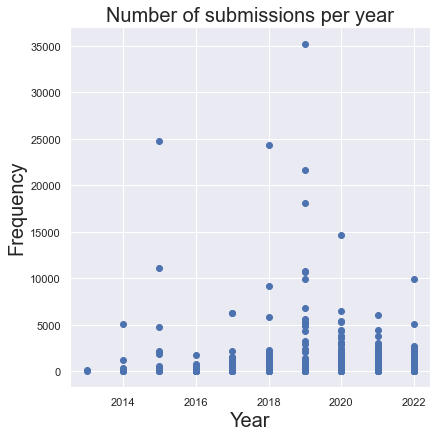

In [169]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_xlabel('Year', fontsize=20)
axes.set_ylabel('Frequency', fontsize=20)
plt.rcParams['axes.titlesize'] = 20
axes.set_title('Number of submissions per year')
axes.scatter(x = db['year'], y = db['submissions'])

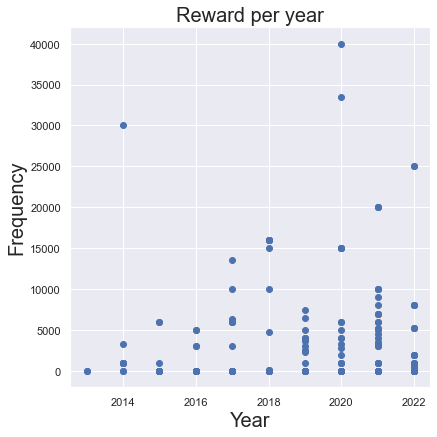

In [170]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_xlabel('Year', fontsize=20)
axes.set_ylabel('Frequency', fontsize=20)
plt.rcParams['axes.titlesize'] = 20
axes.set_title('Reward per year')
axes.scatter(x = db['year'], y = db['reward_USD'])
plt.show()

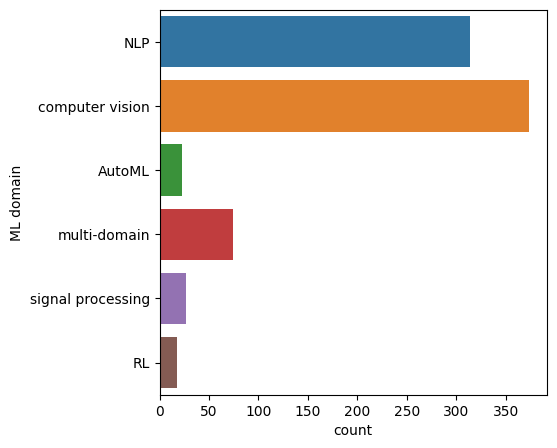

In [62]:
sns.countplot(y = 'ML domain',  data = db); 

<AxesSubplot: title={'center': 'Machine learning domains distribution'}>

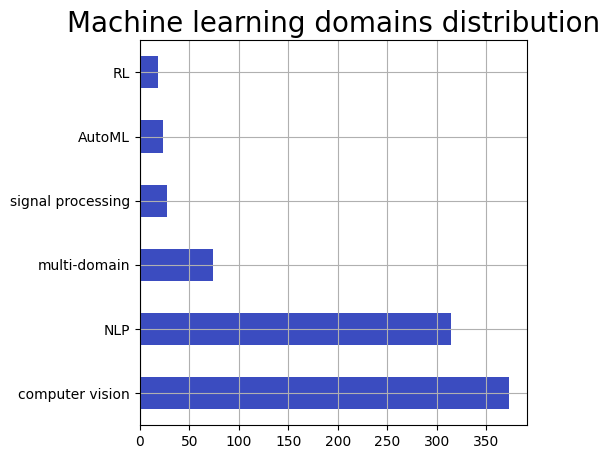

In [63]:
# second version
db['ML domain'].value_counts().plot(kind = 'barh', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Machine learning domains distribution')

<AxesSubplot: xlabel='count', ylabel='ML domain'>

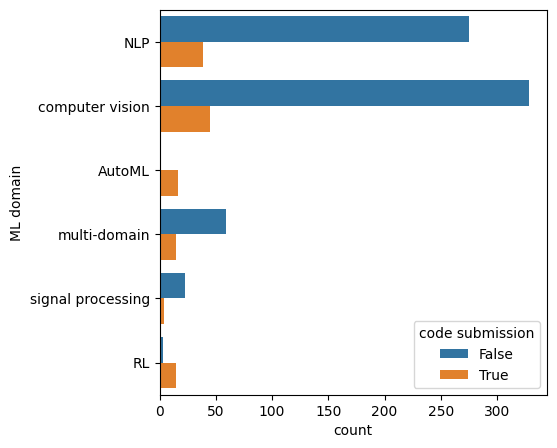

In [64]:
# TODO: better visualization
sns.countplot(y = 'ML domain',  data = db, hue = "code submission") 

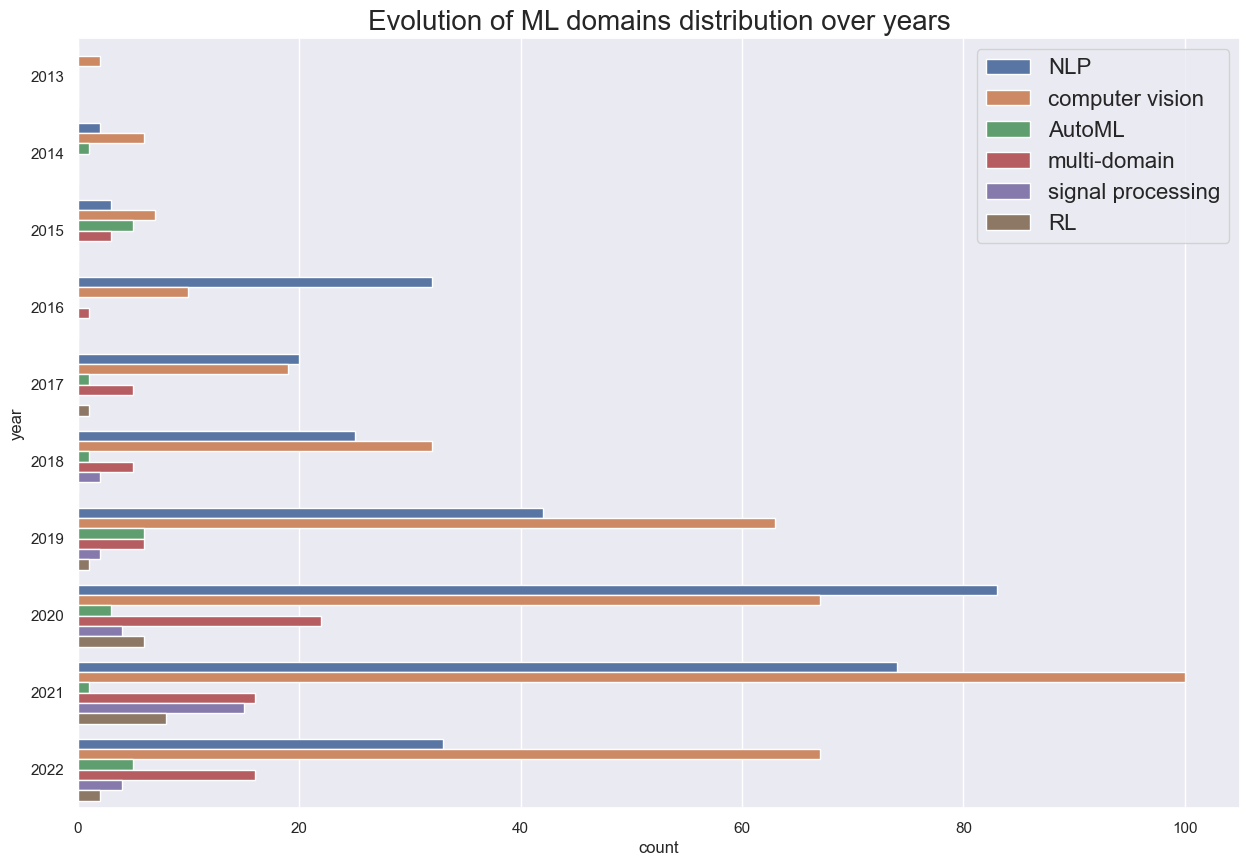

In [65]:
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.countplot(y="year", hue="ML domain", data=db)
plt.legend(loc='upper right',fontsize = 16)
plt.title("Evolution of ML domains distribution over years", fontsize=20)
fig = ax.get_figure()
fig.savefig('images/MLdomains_years.png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


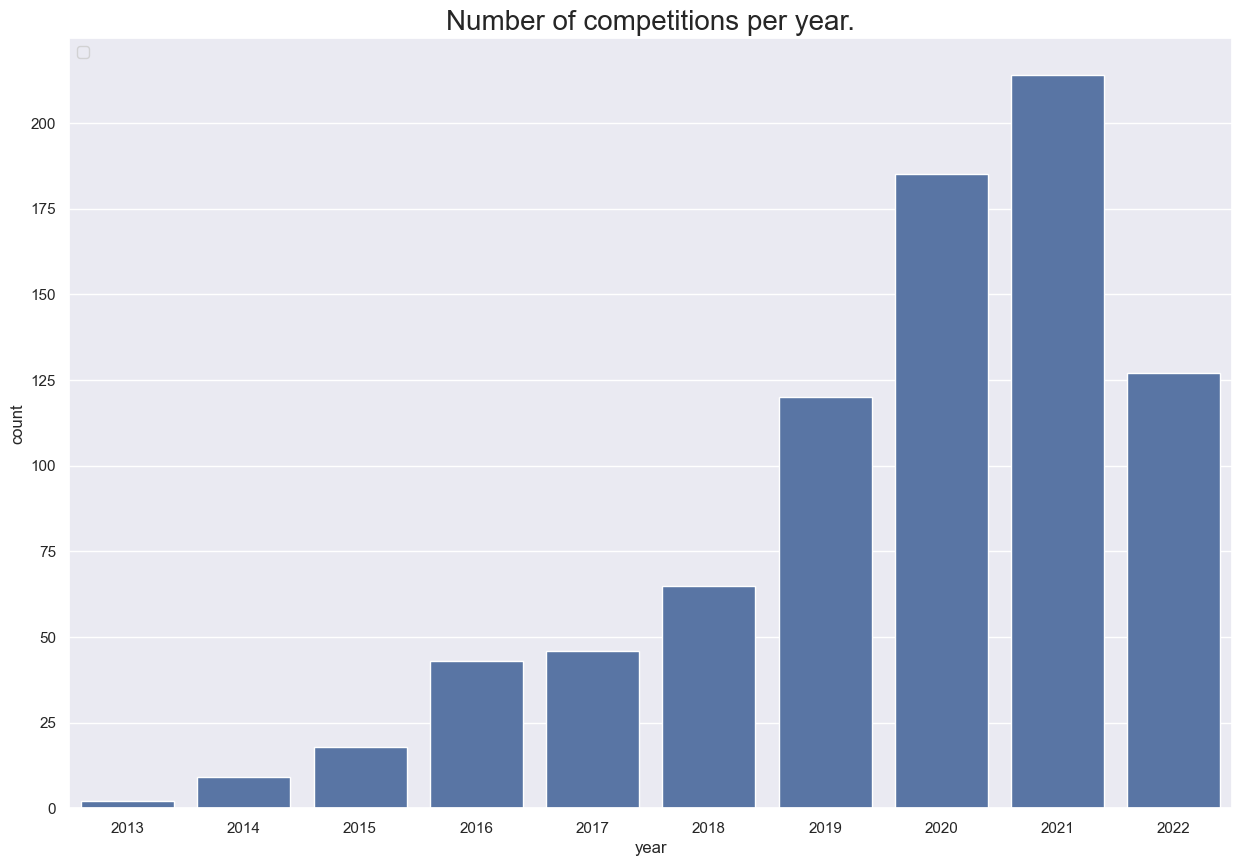

In [66]:
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.countplot(x="year", data=db, color='#5975a4', saturation=1)
plt.legend(loc='upper left')
plt.title("Number of competitions per year.", fontsize=20)
fig = ax.get_figure()
#fig.savefig('images/Nbr_compet_year.png')

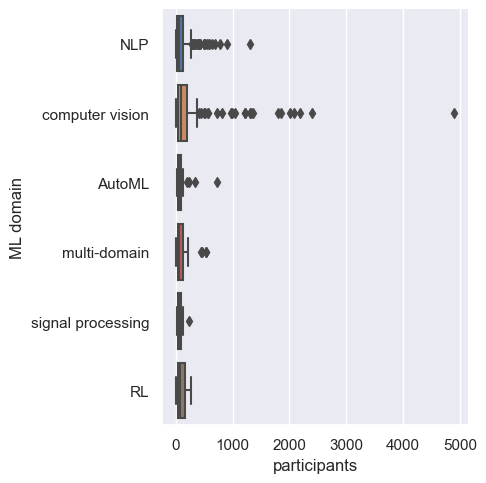

In [67]:
sns.catplot(x="participants", y="ML domain", kind="box", data=db, orient="h")

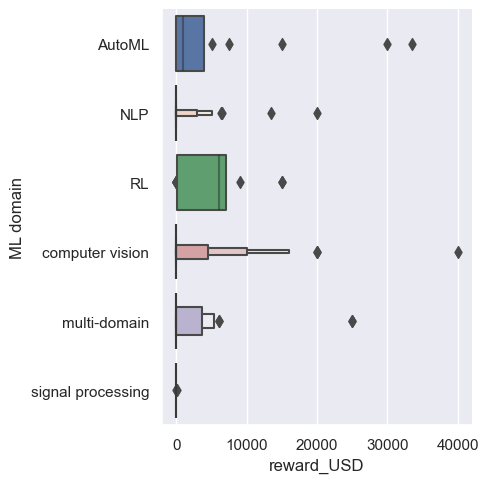

In [68]:
sns.catplot(x="reward_USD", y="ML domain", kind="boxen", # x="log_reward"
            data=db.sort_values("ML domain"), orient="h")

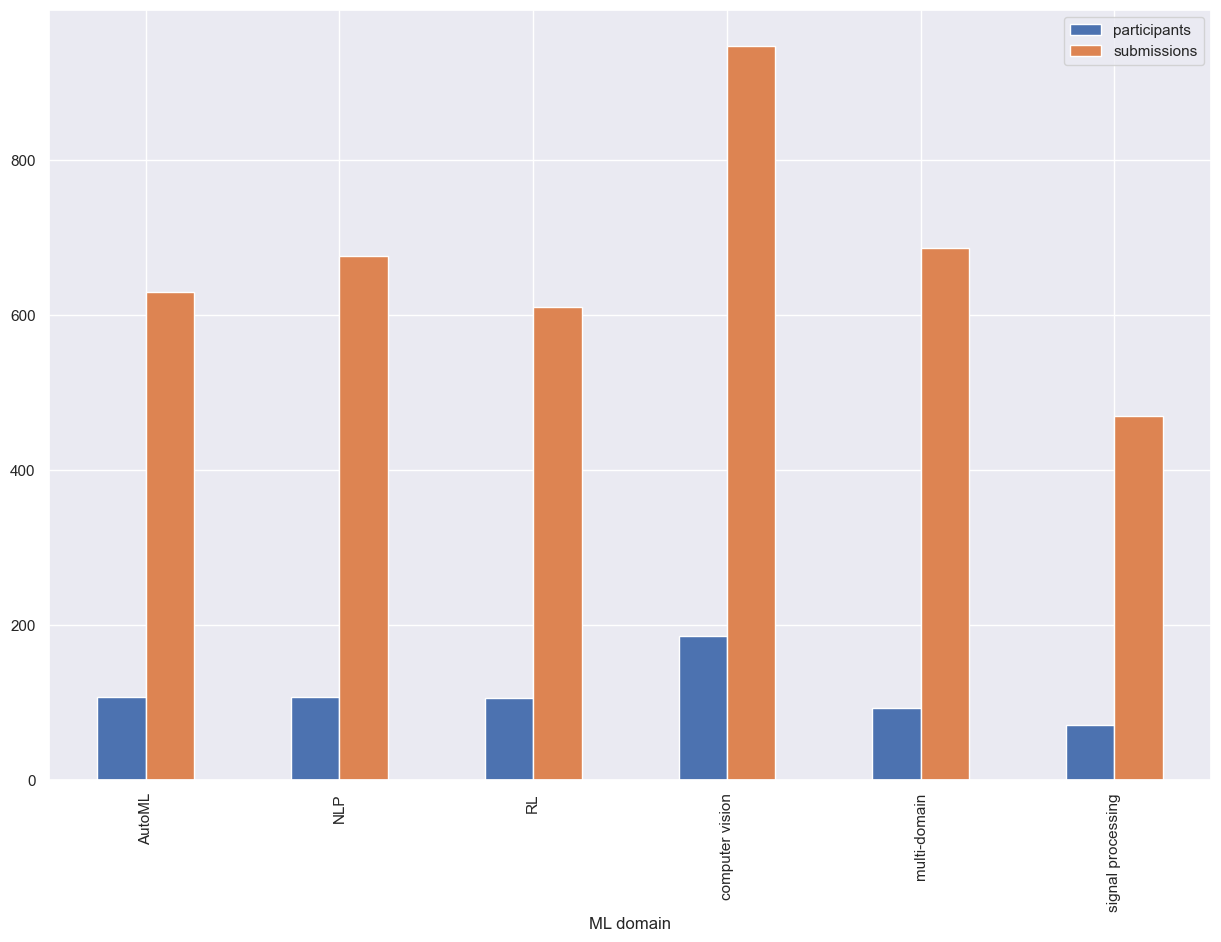

In [69]:
db.pivot_table(values = ['participants', 'submissions'], index = 'ML domain', aggfunc = 'mean').plot(kind = 'bar')
plt.rcParams["figure.figsize"] = (20,3)

## It's pie charts time!
### Experiments with different pie charts

In [70]:
domains1 = db['ML domain'].value_counts()

In [71]:
domains1.values

array([373, 314,  74,  27,  23,  18])

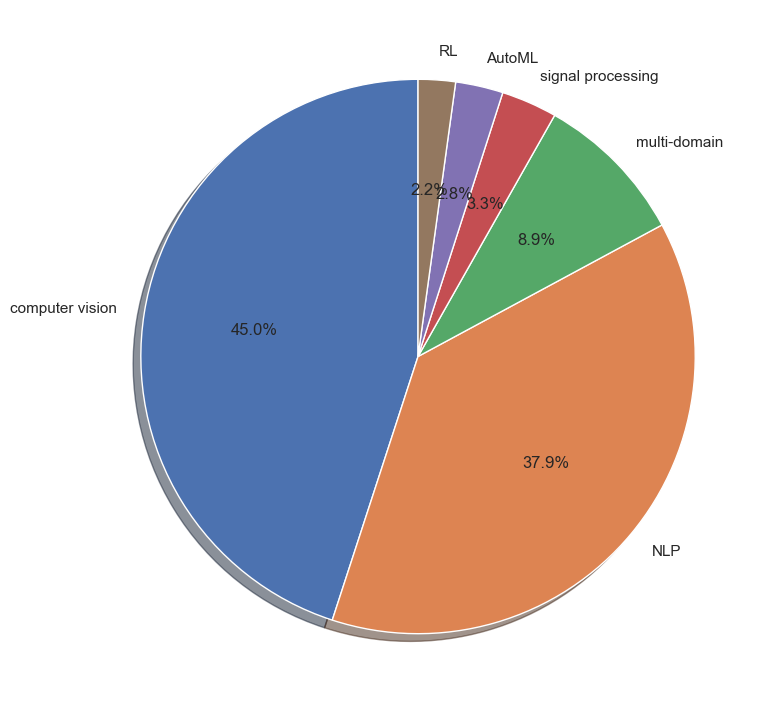

In [72]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = domains1.index
sizes = domains1.values
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
#plt.rcParams["figure.figsize"] = (80,12)

fig1, ax1 = plt.subplots(figsize=(18, 9), subplot_kw=dict(aspect="equal"))

ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.



#sns.set(rc = {'figure.figsize':(40,35)})
plt.show()

fig1.savefig('images/piechart_domains.png')

In [73]:
df_domains = db.groupby('ML domain', axis=0).count()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(db.groupby('ML domain', axis=0)))

df_domains.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


title  description  participants  submissions  year  phases  \
ML domain                                                                      
AutoML              23           21            23           22    23      23   
NLP                313          301           314          313   314     314   
RL                  18           17            18           18    18      18   
computer vision    373          364           373          370   373     373   
multi-domain        74           71            74           72    74      74   

                 reward  reward_USD  duration_day  challenge  website  papers  \
ML domain                                                                       
AutoML               22          23            23         23        1       2   
NLP                 313         314           305        314       38      25   
RL                   18          18            18         18        4       0   
computer vision     370         373           364        373       51      23   
multi-domain         73          74            68         74       16       6   

                 winner's code  dataset  field of application  real task  \
ML domain                                                                  
AutoML                       1        1                     4          6   
NLP                         16       15                   299        304   
RL                           0        0                    11         18   
computer vision             24       12                   328        361   
multi-domain                 2        1                    59         69   

                 ML task  dataset size  dataset details  score  metrics  \
ML domain                                                                 
AutoML                13             0                0     22        6   
NLP                  302             4               22    287      313   
RL                    18             0                0     17       12   
computer vision      361            12               49    366      367   
multi-domain          67             1                9     72       73   

                 multi-score  multi-task  results submission  code submission  \
ML domain                                                                       
AutoML                     6           6                  16               16   
NLP                      314         314                 314              314   
RL                        12          12                  18               18   
computer vision          371         371                 373              373   
multi-domain              73          73                  74               74   

                 remark  submission_per_participant  log_reward  \
ML domain                                                         
AutoML                0                          22          23   
NLP                  11                         313         314   
RL                    0                          18          18   
computer vision       7                         370         373   
multi-domain          0                          72          74   

                 log_submissions  log_participants  
ML domain                                           
AutoML                        22                23  
NLP                          313               314  
RL                            18                18  
computer vision              370               373  
multi-domain                  72                74

In [74]:
type_labels = df_domains['title'].sort_values().index
type_counts = df_domains['title'].sort_values()

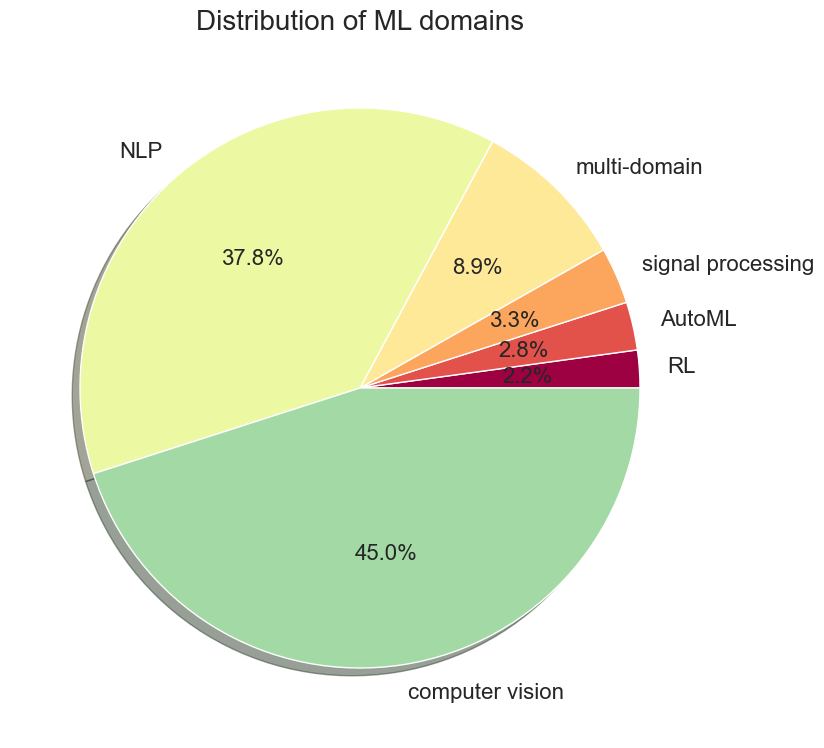

In [75]:
plt.figure(1, figsize=(40,20)) 
the_grid = GridSpec(2, 2)

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]
plt.rcParams['axes.titlesize'] = 20
plt.subplot(the_grid[0, 1], aspect=1, title='Distribution of ML domains')
type_show_ids = plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%', textprops={'fontsize': 16}, \
                        shadow=True, colors=colors)
plt.savefig("images/MLdomains_piechart.png")
plt.show()

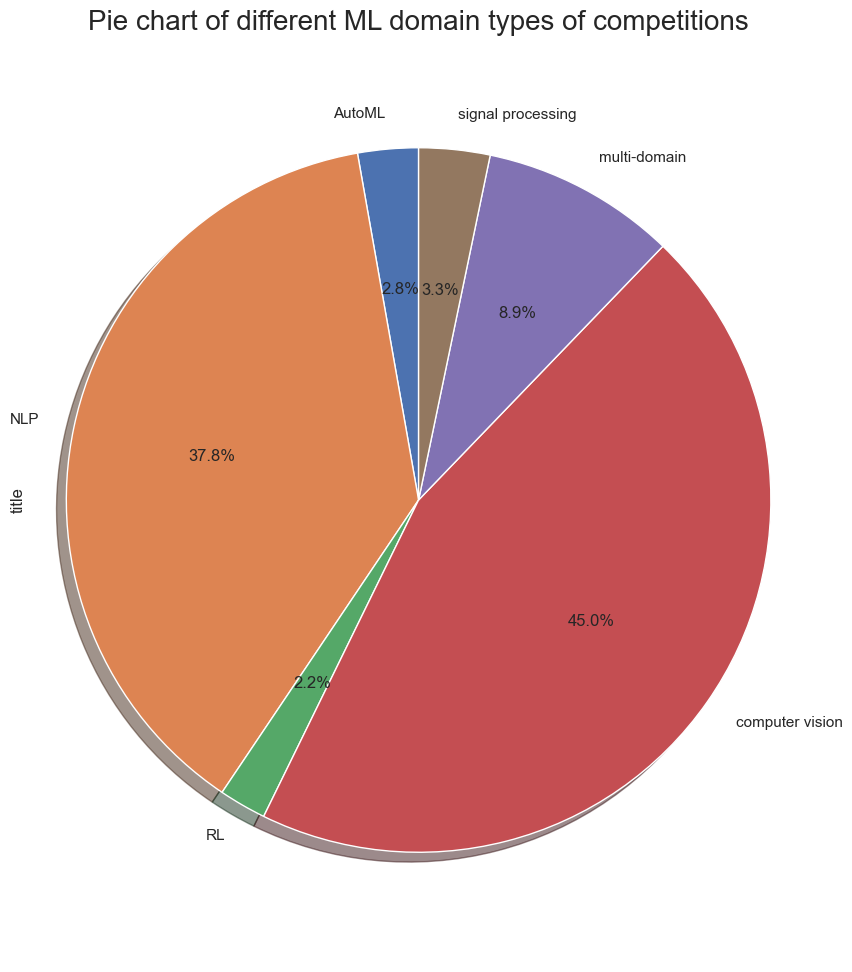

In [76]:
df_domains['title'].plot(kind='pie',
                            figsize=(10, 12),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Pie chart of different ML domain types of competitions', fontsize=20)
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

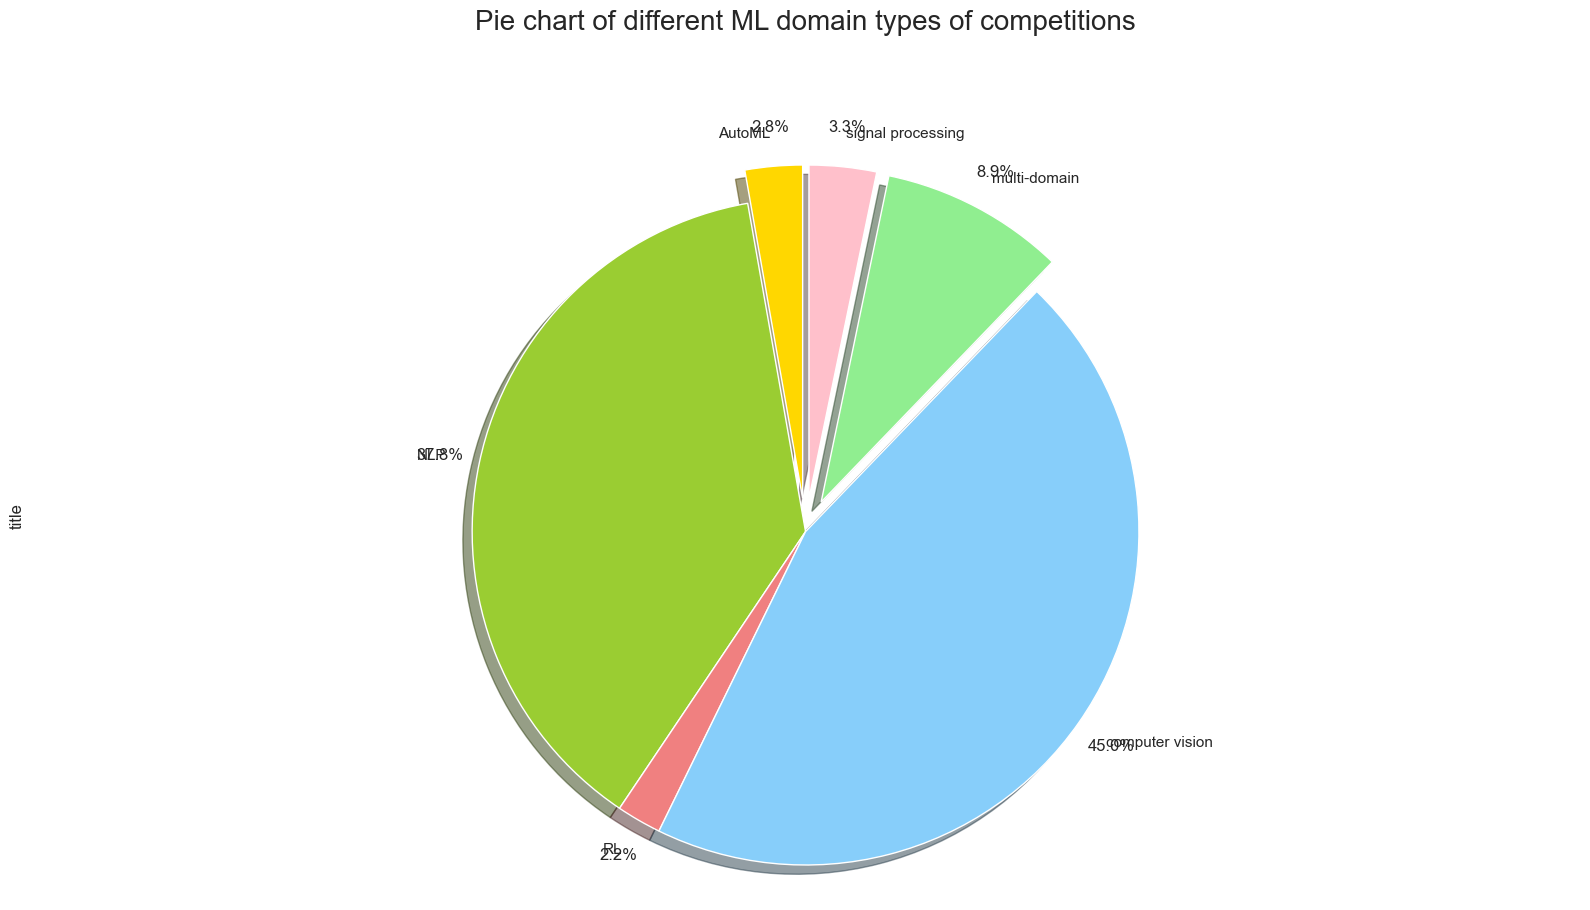

In [77]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_domains['title'].plot(kind='pie',
                            figsize=(20, 10),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=df_domains.index,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Pie chart of different ML domain types of competitions', y=1.12) 

plt.axis('equal') 

# add legend
#plt.legend(labels=df_domains.index, loc='upper left') 

plt.show()

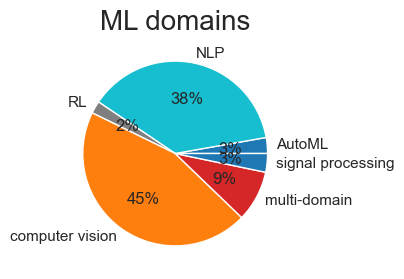

In [78]:
x = df_domains['title']
labels = df_domains.index
colors = ['tab:blue', 'tab:cyan', 'tab:gray', 'tab:orange', 'tab:red']

fig, ax = plt.subplots()
ax.pie(x, labels = labels, colors = colors, autopct='%.0f%%')
ax.set_title('ML domains')
plt.show()

# Utility

In [39]:
# Utility
# Keep only one float for each utility
# Remove other rows

def handle_nan_and_convert(value):
    try:
        # convert to float if possible, otherwise check if it's 'nan'
        return float(value) if value != 'nan' else 0.0
    except ValueError:
        # value is not a number nor 'nan', return a default value or handle as per your requirement
        return 0.0 #np.nan 

def convert_list_values_to_float(list_string):
    list_elements = list_string.strip('][').split(', ')
    return [handle_nan_and_convert(element) for element in list_elements]

# Apply the function to the 'utility' column
db['utility'] = db['utility'].apply(convert_list_values_to_float)

# Keep only rows where the utility list is not empty
db = db[db['utility'].apply(len) > 0]

# Keep only rows where the max utility is above or equal to 1
db = db[db['utility'].apply(lambda utilities: max(utilities) >= 1)]

# Replace the utility list by the max utility
db['utility'] = db['utility'].apply(max)


In [40]:
db

title  \
0    The Third Evaluation Workshop on Chinese Machi...   
1      Pose-guided Human Rendering Benchmark Challenge   
3     ChaLearn LAP 2014 - Track 1: Human Pose Recovery   
4      ChaLearn LAP 2014 - Track 2: Action Recognition   
5     ChaLearn LAP 2014 - Track 3: Gesture Recognition   
..                                                 ...   
807  UIoU Dark Zurich at Vision for All Seasons Wor...   
808                                             CodRED   
809  LOVEU@CVPR'22 Track 1: Generic Event Boundary ...   
811  IberLEF 2022 Task - PoliticEs. Spanish Author ...   
812        TG-CSR (Vacation dataset, Multi-set format)   

                                           description  participants  \
0    It is the sentence cloze-style machine reading...            46   
1    HUMBI is an ideal dataset to evaluate the abil...            12   
3    More than 8,000 frames of continuous RGB seque...           100   
4    Recognizing actions/interactions using 235 per...           108   
5    Recognizing gestures drawn from a vocabulary o...           299   
..                                                 ...           ...   
807  UIoU Dark Zurich benchmarks semantic segmentat...            12   
808                  Cross-document relation extration             9   
809  This competition is for generic event boundary...            43   
811  Political ideology is a psychographic trait th...            63   
812  Theoretically-Grounded Commonsense Reasoning (...            10   

     submissions  year  phases    reward  reward_USD  duration_day  \
0          248.0  2019     3.0  6500 USD        6500          87.0   
1           65.0  2013     1.0         0           0           NaN   
3           25.0  2014     2.0  1000 USD        1000         108.0   
4           36.0  2014     2.0  1000 USD        1000         108.0   
5          373.0  2014     2.0  1000 USD        1000         108.0   
..           ...   ...     ...       ...         ...           ...   
807         53.0  2020     2.0      None          -1          86.0   
808         40.0  2022     2.0      None          -1           0.0   
809        314.0  2022     2.0      None          -1           7.0   
811        201.0  2022     3.0      None          -1          84.0   
812         45.0  2022     1.0      None          -1           0.0   

                                             challenge  ... multi-score  \
0    https://competitions.codalab.org/competitions/...  ...        True   
1    https://competitions.codalab.org/competitions/...  ...       False   
3    https://competitions.codalab.org/competitions/971  ...       False   
4    https://competitions.codalab.org/competitions/981  ...       False   
5    https://competitions.codalab.org/competitions/991  ...       False   
..                                                 ...  ...         ...   
807  https://codalab.lisn.upsaclay.fr/competitions/...  ...        True   
808  https://codalab.lisn.upsaclay.fr/competitions/...  ...        True   
809  https://codalab.lisn.upsaclay.fr/competitions/...  ...        True   
811  https://codalab.lisn.upsaclay.fr/competitions/...  ...        True   
812  https://codalab.lisn.upsaclay.fr/competitions/...  ...       False   

    multi-task results submission code submission  \
0        False               True           False   
1        False               True           False   
3        False               True            True   
4        False               True            True   
5        False               True            True   
..         ...                ...             ...   
807      False               True           False   
808      False               True            True   
809      False               True            True   
811      False               True           False   
812      False               True            True   

                                                remark   utility  \
0    https://github.com/ymcui/cmrc2019/t

# Correlation matrix

In [41]:
db.corr()

/var/folders/48/4n4hcp112zbdf81wrzbqmc3c0000gn/T/ipykernel_23762/2287404026.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  db.corr()


participants  submissions      year    phases  \
participants                    1.000000     0.735881 -0.094777  0.027991   
submissions                     0.735881     1.000000 -0.039317  0.053145   
year                           -0.094777    -0.039317  1.000000  0.025851   
phases                          0.027991     0.053145  0.025851  1.000000   
reward_USD                      0.172327     0.043979  0.023913  0.000947   
duration_day                   -0.063998    -0.042714 -0.018353 -0.073803   
utility                         0.003815    -0.006891  0.013765 -0.030255   
submission_per_participant      0.009230     0.372343  0.111558  0.212491   
log_reward                     -0.175859    -0.329764  0.408950  0.171669   
log_submissions                 0.541065     0.569584  0.053771  0.216198   
log_participants                0.728393     0.467617 -0.063388  0.051503   

                            reward_USD  duration_day   utility  \
participants                  0.172327     -0.063998  0.003815   
submissions                   0.043979     -0.042714 -0.006891   
year                          0.023913     -0.018353  0.013765   
phases                        0.000947     -0.073803 -0.030255   
reward_USD                    1.000000     -0.036314 -0.016269   
duration_day                 -0.036314      1.000000 -0.038434   
utility                      -0.016269     -0.038434  1.000000   
submission_per_participant   -0.021693     -0.042564  0.002292   
log_reward                    0.574996     -0.012038  0.045744   
log_submissions               0.147677     -0.101228  0.071308   
log_participants              0.202776     -0.126524  0.075663   

                            submission_per_participant  log_reward  \
participants                                  0.009230   -0.175859   
submissions                                   0.372343   -0.329764   
year                                          0.111558    0.408950   
phases                                        0.212491    0.171669   
reward_USD                                   -0.021693    0.574996   
duration_day                                 -0.042564   -0.012038   
utility                                       0.002292    0.045744   
submission_per_participant                    1.000000   -0.093837   
log_reward                                   -0.093837    1.000000   
log_submissions                               0.488086    0.031685   
log_participants                             -0.011189    0.148430   

                            log_submissions  log_participants  
participants                       0.541065          0.728393  
submissions                        0.569584          0.467617  
year                               0.053771         -0.063388  
phases                             0.216198          0.051503  
reward_USD                         0.147677          0.202776  
duration_day                      -0.101228         -0.126524  
utility                            0.071308          0.075663  
submission_per_participant         0.488086         -0.011189  
log_reward                         0.031685          0.148430  
log_submissions                    1.000000          0.688316  
log_participants                   0.688316          1.000000

/var/folders/48/4n4hcp112zbdf81wrzbqmc3c0000gn/T/ipykernel_23762/1370929774.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(db[['participants', 'submissions', 'year','reward_USD', 'duration_day','code submission',\


<AxesSubplot: >

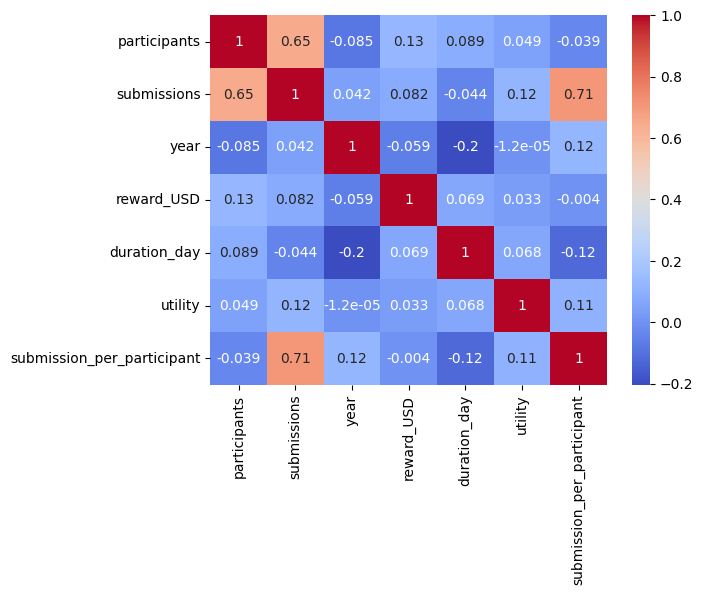

In [42]:
sns.heatmap(db[['participants', 'submissions', 'year','reward_USD', 'duration_day','code submission',\
                'utility', 'submission_per_participant']].corr(method='spearman'), annot = True, cmap = 'coolwarm')

/var/folders/48/4n4hcp112zbdf81wrzbqmc3c0000gn/T/ipykernel_23762/4014728876.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(db.corr(method='spearman'), annot = True, cmap = 'coolwarm')


<AxesSubplot: >

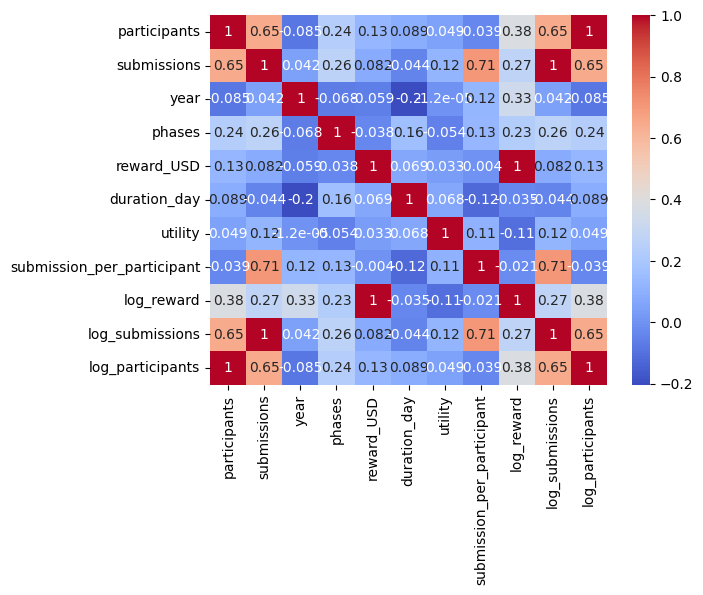

In [43]:
sns.heatmap(db.corr(method='spearman'), annot = True, cmap = 'coolwarm')

# Pairplots

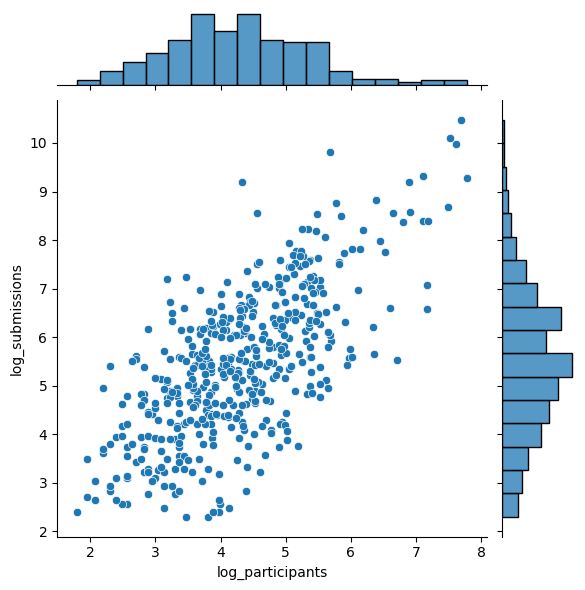

In [44]:
sns.jointplot(x = 'log_participants', y = 'log_submissions', data = db)

In [45]:
#sns.pairplot(db[['participants', 'submissions', 'year', 'reward_USD', 'duration_day', 'results submission','code submission']])#, hue = 'smoker')

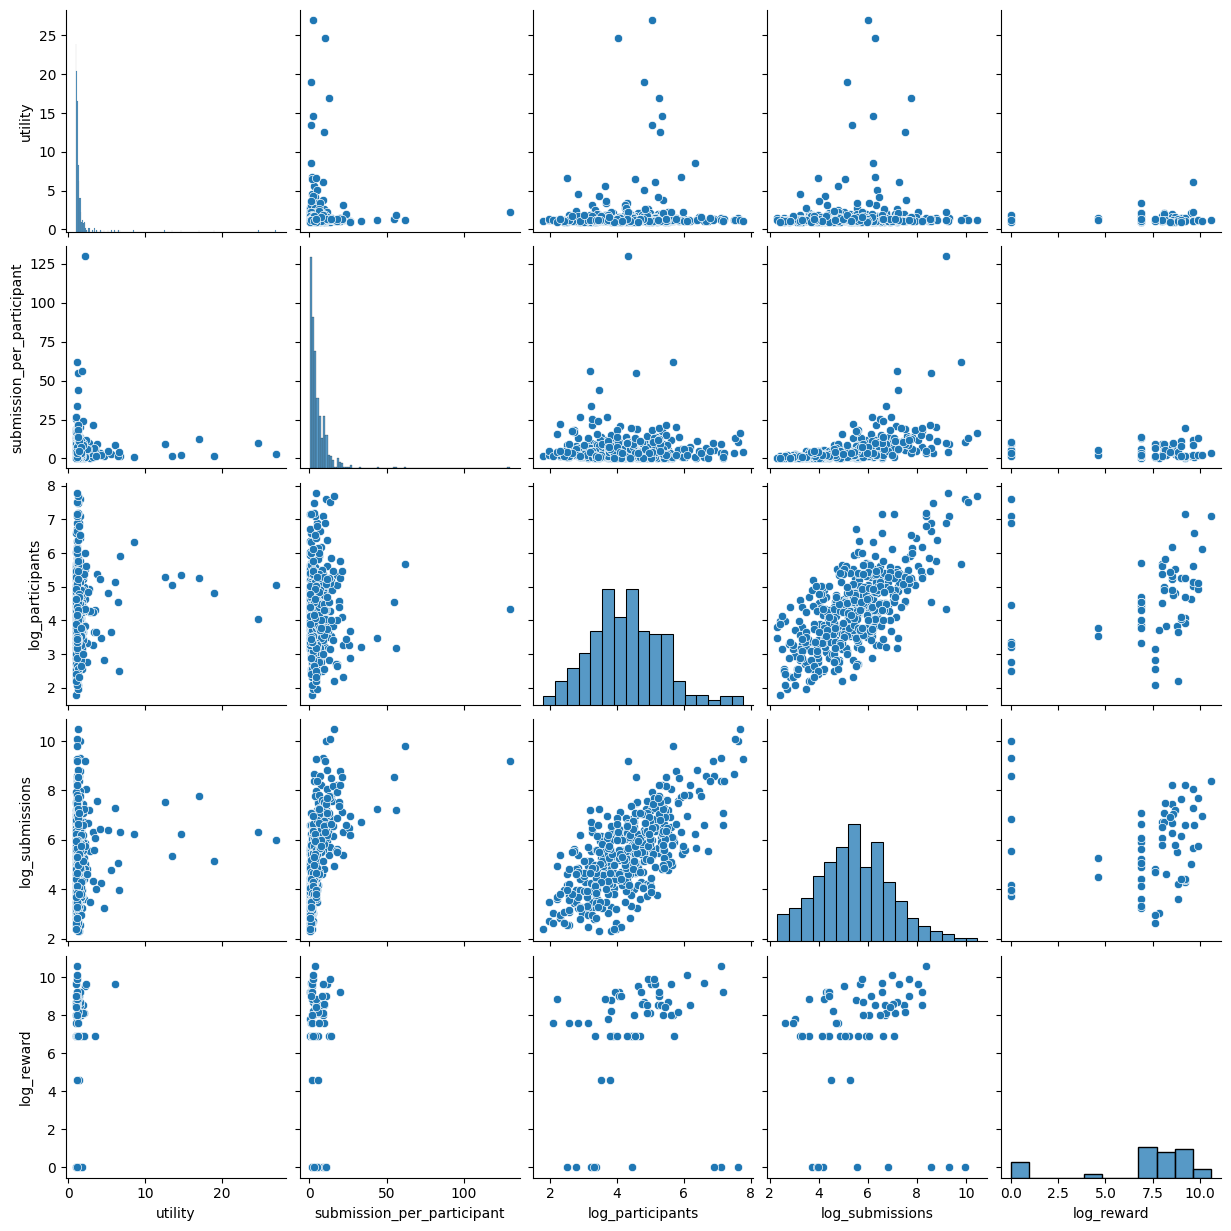

In [47]:
sns.pairplot(db[['utility', \
                 #'u_median', \
                 'submission_per_participant', \
                 'log_participants', \
                 'log_submissions', \
                 #'year', \
                 'log_reward']])#, hue = 'code submission')

## Feature importances with a forest of trees

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [48]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import time

In [49]:
db_features=db.dropna(subset=['utility'])

In [50]:
db_features.describe()

/opt/homebrew/lib/python3.10/site-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


participants   submissions         year      phases    reward_USD  \
count    473.000000    473.000000   473.000000  473.000000    473.000000   
mean     144.052854    852.287526  2019.731501    2.391121    773.558140   
std      266.497892   2643.959469     1.854279    1.930269   3263.755408   
min        6.000000     10.000000  2013.000000    1.000000     -1.000000   
25%       35.000000     83.000000  2019.000000    2.000000     -1.000000   
50%       70.000000    231.000000  2020.000000    2.000000     -1.000000   
75%      147.000000    594.000000  2021.000000    2.000000     -1.000000   
max     2401.000000  35260.000000  2022.000000   19.000000  40000.000000   

       duration_day     utility  submission_per_participant  log_reward  \
count    462.000000  473.000000                  473.000000   473.00000   
mean     911.199134    1.667961                    5.765721        -inf   
std     4248.852536    2.278680                    8.848017         NaN   
min        0.000000    1.000000                    0.193548        -inf   
25%       48.000000    1.092015                    1.557692         NaN   
50%       74.000000    1.206335                    3.473684         NaN   
75%      119.750000    1.434783                    7.260274         NaN   
max    29384.000000   27.000000                  129.763158    10.59666   

       log_submissions  log_participants  
count       473.000000        473.000000  
mean          5.470186          4.289610  
std           1.501626          1.079140  
min           2.302585          1.791759  
25%           4.418841          3.555348  
50%           5.442418          4.248495  
75%           6.386879          4.990433  
max          10.470504          7.783641

In [51]:
y=db_features['utility']
X=db_features[['participants','submissions','year','phases','reward_USD','duration_day','multi-score',\
      'multi-task','results submission','code submission','submission_per_participant']]

In [52]:
np.sum(pd.isna(y))

0

In [53]:
print(X.shape)
print(y)

(473, 11)
0      1.176030
1      1.192141
3      1.829352
4      2.079579
5      1.360556
         ...   
807    6.602703
808    1.000000
809    1.630332
811    1.121067
812    1.401371
Name: utility, Length: 473, dtype: float64


In [54]:
X.fillna(X.mean(),inplace=True)

/var/folders/48/4n4hcp112zbdf81wrzbqmc3c0000gn/T/ipykernel_23762/2181397073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(),inplace=True)


In [56]:
#np.sum(np.isnan(X))

In [57]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)
feature_names = [f"feature {i}" for i in range(X.shape[1])]
feature_names = list(X_train.columns)
#forest = RandomForestClassifier(random_state=0)
forest = RandomForestRegressor(random_state=0)

forest.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [58]:
start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.016 seconds


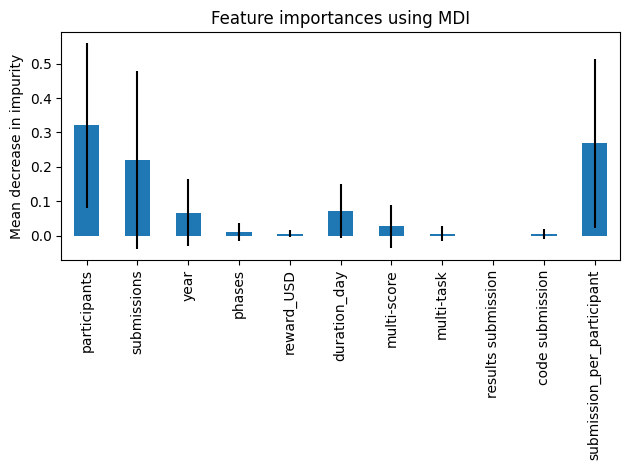

In [59]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

fig.tight_layout()
plt.rcParams["figure.figsize"] = (20,20)

## Feature importance based on feature permutation

In [60]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 1.471 seconds


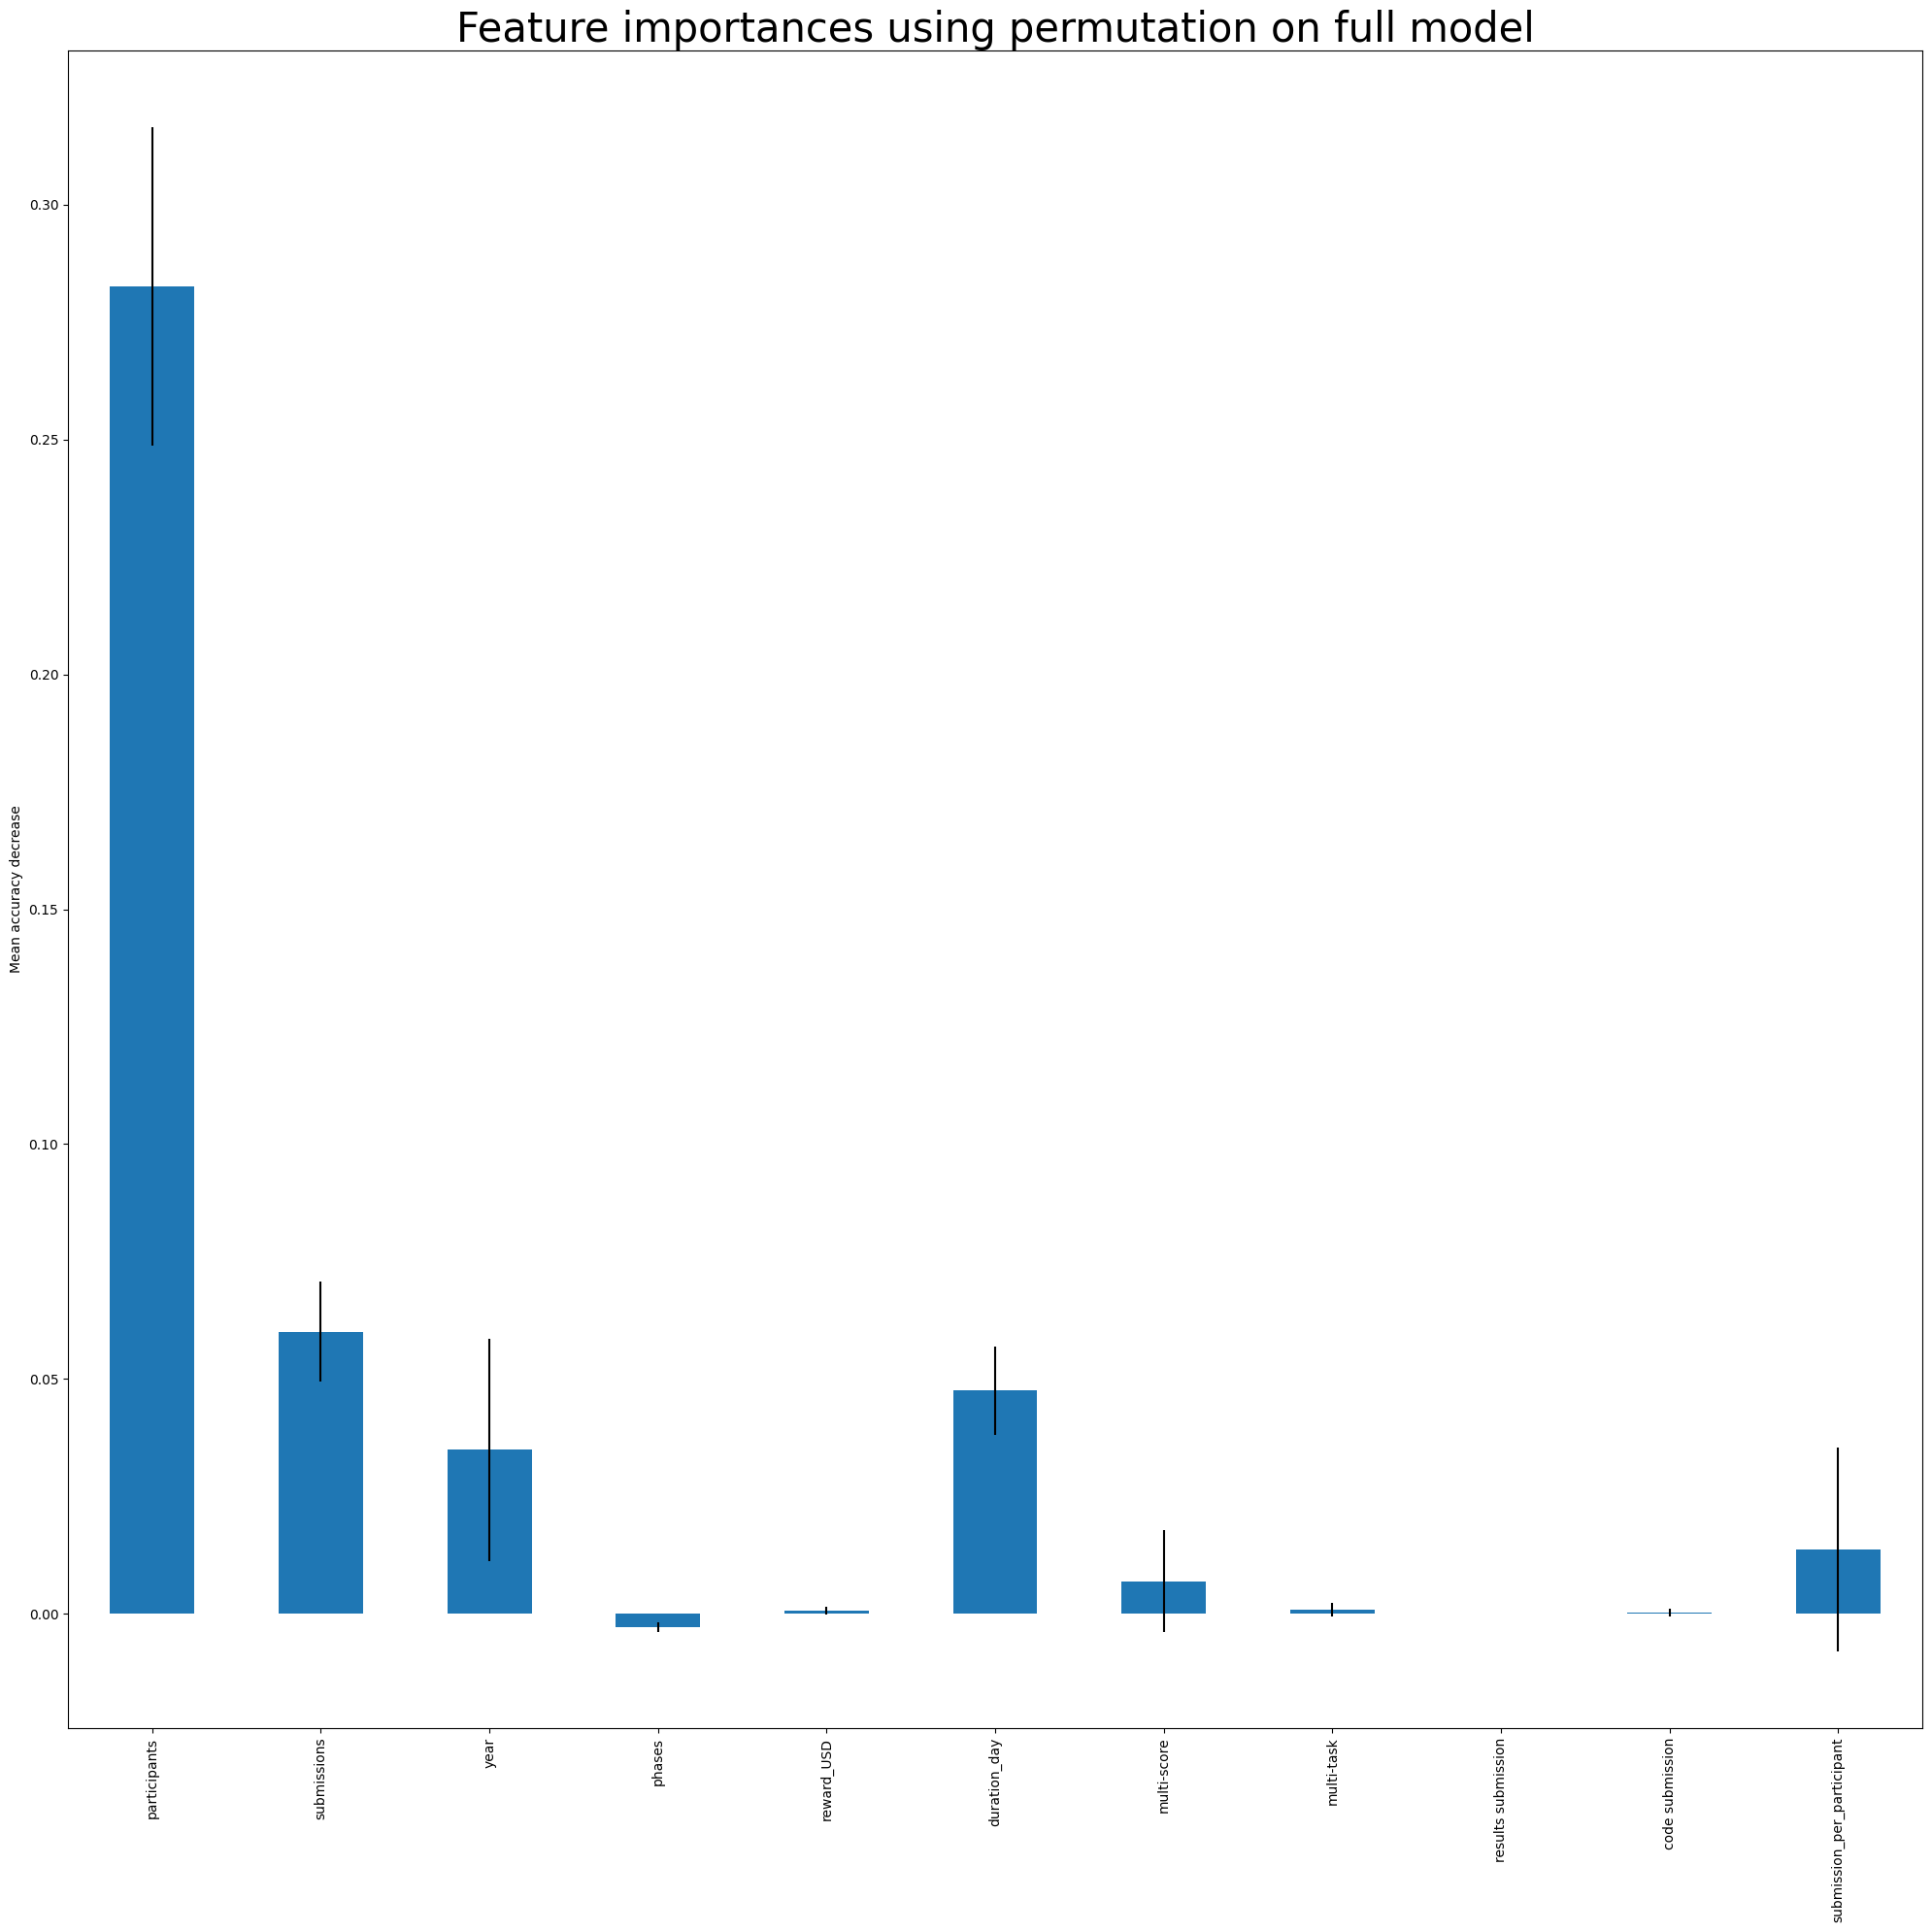

In [61]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model", fontsize=30)
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()
plt.rcParams["figure.figsize"] = (20,10)